In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
#Load the data

df = pd.read_csv("mobile_price_data.csv")
df.head()


,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,"Realme Narzo 10A (So White, 32 GB)","₹8,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
1,"Realme Narzo 10A (So Blue, 32 GB)","₹8,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
2,"Realme Narzo 10A (So Blue, 64 GB)","₹9,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
3,"Realme Narzo 10A (So White, 64 GB)","₹9,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
4,"Realme Narzo 10 (That Green, 128 GB)","₹11,999",That Green,Dual Sim,16.51 cm (6.5 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,128 GB,4 GB,48MP + 8MP + 2MP + 2MP,16MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75.4 mm,164.4 mm,9 mm,199 g


In [3]:
df.shape

(459, 20)

In [4]:
df.isnull().sum()

mobile_name      0
mobile_price     0
mobile_color     0
dual_sim         0
disp_size        0
resolution       0
os               0
num_cores        0
mp_speed         0
int_memory       0
ram              0
p_cam            0
f_cam            0
network          0
bluetooth        0
battery_power    0
mob_width        0
mob_height       0
mob_depth        0
mob_weight       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   mobile_name    459 non-null    object
 1   mobile_price   459 non-null    object
 2   mobile_color   459 non-null    object
 3   dual_sim       459 non-null    object
 4   disp_size      459 non-null    object
 5   resolution     459 non-null    object
 6   os             459 non-null    object
 7   num_cores      459 non-null    object
 8   mp_speed       459 non-null    object
 9   int_memory     459 non-null    object
 10  ram            459 non-null    object
 11  p_cam          459 non-null    object
 12  f_cam          459 non-null    object
 13  network        459 non-null    object
 14  bluetooth      459 non-null    object
 15  battery_power  459 non-null    object
 16  mob_width      459 non-null    object
 17  mob_height     459 non-null    object
 18  mob_depth      459 non-null   

In [5]:
df["mob_weight"]= df["mob_weight"].str.replace("g", '')
df['mob_height']=df['mob_height'].str.replace('mm','')
df['mob_depth']=df['mob_depth'].str.replace('mm','')
df['mob_width']=df['mob_width'].str.replace('mm','')
df['battery_power']=df['battery_power'].str.replace('mAh','')
df['mp_speed']=df['mp_speed'].str.replace('GHz','')
df['int_memory']=df['int_memory'].str.replace('GB','')
df['ram']=df['ram'].str.replace('GB','')

df

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,"Realme Narzo 10A (So White, 32 GB)","₹8,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2,32,3,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000,75,164.4,8.95,195
1,"Realme Narzo 10A (So Blue, 32 GB)","₹8,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2,32,3,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000,75,164.4,8.95,195
2,"Realme Narzo 10A (So Blue, 64 GB)","₹9,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2,64,4,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000,75,164.4,8.95,195
3,"Realme Narzo 10A (So White, 64 GB)","₹9,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2,64,4,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000,75,164.4,8.95,195
4,"Realme Narzo 10 (That Green, 128 GB)","₹11,999",That Green,Dual Sim,16.51 cm (6.5 inch),1600 x 720 Pixels,Android 10,Octa Core,2,128,4,48MP + 8MP + 2MP + 2MP,16MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000,75.4,164.4,9,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,"OPPO A83 (Black, 32 GB)","₹13,490",Black,Dual Sim,14.48 cm (5.7 inch),1440 x 720 Pixels,Android Nougat 7.1,Octa Core,2.5,32,3,13MP Rear Camera,8MP Front Camera,"3G, 4G VOLTE, 2G",Yes,3180,73.1,150.5,7.7,143
455,"OPPO A83 (Red, 16 GB)","₹9,490",Red,Dual Sim,14.48 cm (5.7 inch),1440 x 720 Pixels,Android Nougat 7.1,Octa Core,2.5,16,2,13MP Rear Camera,8MP Front Camera,"3G, 4G VOLTE, 4G, 2G",Yes,3180,73.1,150.5,7.7,143
456,"OPPO F7 (Red, 64 GB)","₹22,990",Red,Dual Sim,15.82 cm (6.23 inch),2280 x 1080 Pixels,Android Oreo 8.1.0,Octa Core,2,64,4,16MP Rear Camera,25MP Front Camera,"3G, 4G, 2G",Yes,3400,75.3,156,7.8,158
457,"OPPO F11 (Marble Green, 128 GB)","₹13,990",Marble Green,Dual Sim,16.59 cm (6.53 inch),1080 x 2340 pixels,Android Pie 9.0,Octa Core,2.1,128,4,48MP + 5MP,16MP Front Camera,"3G, 4G VOLTE, 4G, 2G",Yes,4020,76.1,162,8.3,188


In [6]:
#dropping unwanted columns

df = df.drop(['bluetooth','mobile_color'], axis=1)
df

,mobile_name,mobile_price,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,"Realme Narzo 10A (So White, 32 GB)","₹8,999",Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2,32,3,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75,164.4,8.95,195
1,"Realme Narzo 10A (So Blue, 32 GB)","₹8,999",Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2,32,3,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75,164.4,8.95,195
2,"Realme Narzo 10A (So Blue, 64 GB)","₹9,999",Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2,64,4,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75,164.4,8.95,195
3,"Realme Narzo 10A (So White, 64 GB)","₹9,999",Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2,64,4,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75,164.4,8.95,195
4,"Realme Narzo 10 (That Green, 128 GB)","₹11,999",Dual Sim,16.51 cm (6.5 inch),1600 x 720 Pixels,Android 10,Octa Core,2,128,4,48MP + 8MP + 2MP + 2MP,16MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.4,164.4,9,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,"OPPO A83 (Black, 32 GB)","₹13,490",Dual Sim,14.48 cm (5.7 inch),1440 x 720 Pixels,Android Nougat 7.1,Octa Core,2.5,32,3,13MP Rear Camera,8MP Front Camera,"3G, 4G VOLTE, 2G",3180,73.1,150.5,7.7,143
455,"OPPO A83 (Red, 16 GB)","₹9,490",Dual Sim,14.48 cm (5.7 inch),1440 x 720 Pixels,Android Nougat 7.1,Octa Core,2.5,16,2,13MP Rear Camera,8MP Front Camera,"3G, 4G VOLTE, 4G, 2G",3180,73.1,150.5,7.7,143
456,"OPPO F7 (Red, 64 GB)","₹22,990",Dual Sim,15.82 cm (6.23 inch),2280 x 1080 Pixels,Android Oreo 8.1.0,Octa Core,2,64,4,16MP Rear Camera,25MP Front Camera,"3G, 4G, 2G",3400,75.3,156,7.8,158
457,"OPPO F11 (Marble Green, 128 GB)","₹13,990",Dual Sim,16.59 cm (6.53 inch),1080 x 2340 pixels,Android Pie 9.0,Octa Core,2.1,128,4,48MP + 5MP,16MP Front Camera,"3G, 4G VOLTE, 4G, 2G",4020,76.1,162,8.3,188


In [10]:
for value in df:
    print('For {},{} unique values present'.format(value,df[value].nunique()))

For mobile_name,363 unique values present
For mobile_price,139 unique values present
For dual_sim,2 unique values present
For disp_size,36 unique values present
For resolution,48 unique values present
For os,18 unique values present
For num_cores,3 unique values present
For mp_speed,18 unique values present
For int_memory,7 unique values present
For ram,7 unique values present
For p_cam,49 unique values present
For f_cam,15 unique values present
For network,18 unique values present
For battery_power,34 unique values present
For mob_width,70 unique values present
For mob_height,81 unique values present
For mob_depth,55 unique values present
For mob_weight,62 unique values present


In [7]:
df['mobile_price']=df['mobile_price'].replace(['₹',','],'',regex=True)
df["mp_speed"] = df["mp_speed"].replace([" ", ""])
df['mobile_price']=df['mobile_price'].astype(int)
df["mp_speed"] = df["mp_speed"].astype(float)
df["int_memory"] = df["int_memory"].astype(int)
df["ram"] = df["ram"].astype(int)
#battery_power 	mob_width 	mob_height 	mob_depth 	mob_weight
df["battery_power"] = df["battery_power"].astype(int)
df["mob_width"] = df["mob_width"].astype(float)
df["mob_depth"] = df["mob_depth"].astype(float)
df["mob_weight"] = df["mob_weight"].astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mobile_name    459 non-null    object 
 1   mobile_price   459 non-null    int32  
 2   dual_sim       459 non-null    object 
 3   disp_size      459 non-null    object 
 4   resolution     459 non-null    object 
 5   os             459 non-null    object 
 6   num_cores      459 non-null    object 
 7   mp_speed       459 non-null    float64
 8   int_memory     459 non-null    int32  
 9   ram            459 non-null    int32  
 10  p_cam          459 non-null    object 
 11  f_cam          459 non-null    object 
 12  network        459 non-null    object 
 13  battery_power  459 non-null    int32  
 14  mob_width      459 non-null    float64
 15  mob_height     459 non-null    object 
 16  mob_depth      459 non-null    float64
 17  mob_weight     459 non-null    float64
dtypes: float64

In [16]:
from sklearn.preprocessing import LabelEncoder
dualsim = LabelEncoder()
df["dual_sim"] = dualsim.fit_transform(df["dual_sim"])
df

,mobile_name,mobile_price,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,"Realme Narzo 10A (So White, 32 GB)",8999,0,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2.0,32,3,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.0,164.4,8.95,195.0
1,"Realme Narzo 10A (So Blue, 32 GB)",8999,0,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2.0,32,3,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.0,164.4,8.95,195.0
2,"Realme Narzo 10A (So Blue, 64 GB)",9999,0,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2.0,64,4,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.0,164.4,8.95,195.0
3,"Realme Narzo 10A (So White, 64 GB)",9999,0,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2.0,64,4,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.0,164.4,8.95,195.0
4,"Realme Narzo 10 (That Green, 128 GB)",11999,0,16.51 cm (6.5 inch),1600 x 720 Pixels,Android 10,Octa Core,2.0,128,4,48MP + 8MP + 2MP + 2MP,16MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.4,164.4,9.00,199.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,"OPPO A83 (Black, 32 GB)",13490,0,14.48 cm (5.7 inch),1440 x 720 Pixels,Android Nougat 7.1,Octa Core,2.5,32,3,13MP Rear Camera,8MP Front Camera,"3G, 4G VOLTE, 2G",3180,73.1,150.5,7.70,143.0
455,"OPPO A83 (Red, 16 GB)",9490,0,14.48 cm (5.7 inch),1440 x 720 Pixels,Android Nougat 7.1,Octa Core,2.5,16,2,13MP Rear Camera,8MP Front Camera,"3G, 4G VOLTE, 4G, 2G",3180,73.1,150.5,7.70,143.0
456,"OPPO F7 (Red, 64 GB)",22990,0,15.82 cm (6.23 inch),2280 x 1080 Pixels,Android Oreo 8.1.0,Octa Core,2.0,64,4,16MP Rear Camera,25MP Front Camera,"3G, 4G, 2G",3400,75.3,156,7.80,158.0
457,"OPPO F11 (Marble Green, 128 GB)",13990,0,16.59 cm (6.53 inch),1080 x 2340 pixels,Android Pie 9.0,Octa Core,2.1,128,4,48MP + 5MP,16MP Front Camera,"3G, 4G VOLTE, 4G, 2G",4020,76.1,162,8.30,188.0


In [19]:
data = df[["mobile_price","dual_sim","mp_speed","int_memory","ram","battery_power", "mob_width","mob_height", "mob_depth", "mob_weight"]]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mobile_price   459 non-null    int32  
 1   dual_sim       459 non-null    int32  
 2   mp_speed       459 non-null    float64
 3   int_memory     459 non-null    int32  
 4   ram            459 non-null    int32  
 5   battery_power  459 non-null    int32  
 6   mob_width      459 non-null    float64
 7   mob_height     459 non-null    object 
 8   mob_depth      459 non-null    float64
 9   mob_weight     459 non-null    float64
dtypes: float64(4), int32(5), object(1)
memory usage: 27.0+ KB


C:\Users\Sindhiya\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x600 with 0 Axes>

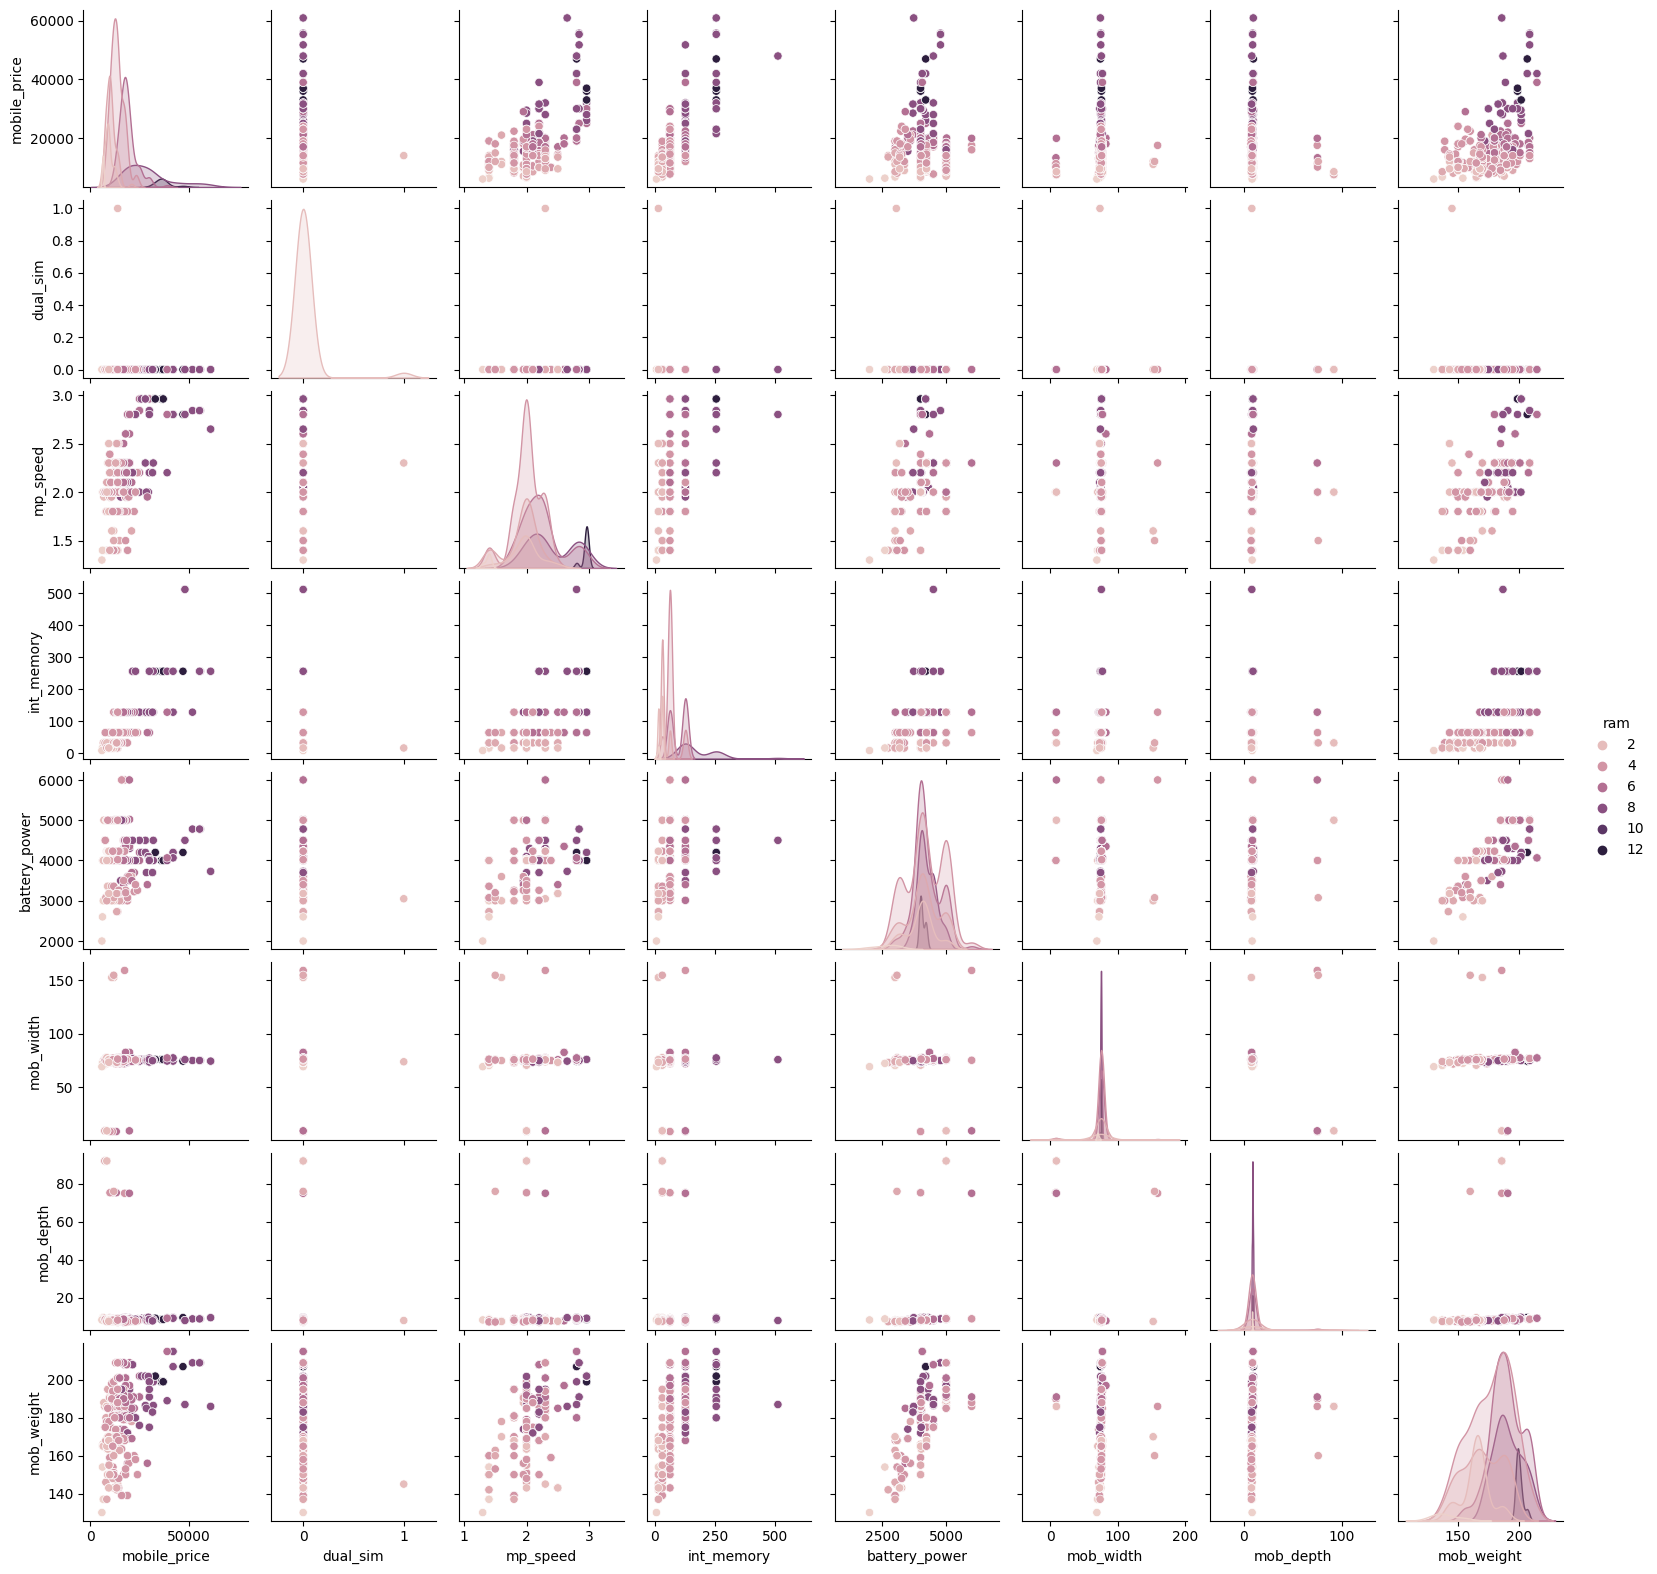

In [21]:
plt.figure(figsize=(10,6))
sns.plotting_context('notebook',font_scale=1.2)
sns.pairplot(data = data, hue="ram", size =2)


<Axes: >

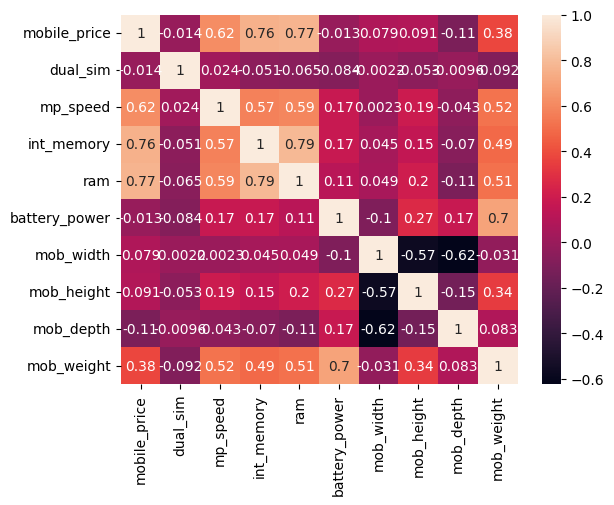

In [20]:
datacorr = data.corr()

sns.heatmap(datacorr, annot = True)

In [22]:
X = data.iloc[:,1:].values
y = data.iloc[:,0].values

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [28]:
#Decision Tree
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)
pred = regressor.predict(X_test)
decision_score=regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred,y_test)

expl_tr
decision_score

0.8127238599098212